In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# A simple Example

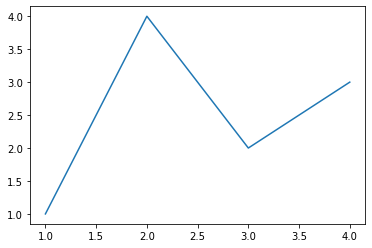

In [2]:
fig, ax = plt.subplots() # Create a figure containing a single axes.
ax.plot([1,2,3,4],[1,4,2,3]) # plot some data on the axes.

In fact, you can do the same in Matplotlib: for each Axes graphing method, there is a corresponding function in the matplotlib.pyplot module that performs that plot on the "current" axes, creating that axes (and its parent figure) if they don't exist yet. So, the previous example can be written more shortly as

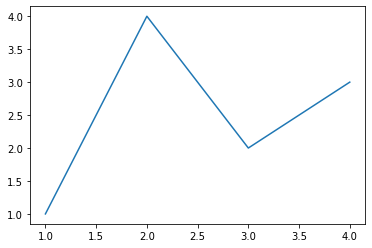

In [3]:
# 위 코드보다 더 간단히 그릴 수 있음.
plt.plot([1,2,3,4],[1,4,2,3])

<h2>Parts of a Figure</h2> <br>
Here is a more detailed layout of the components of a Matplotlib figure.

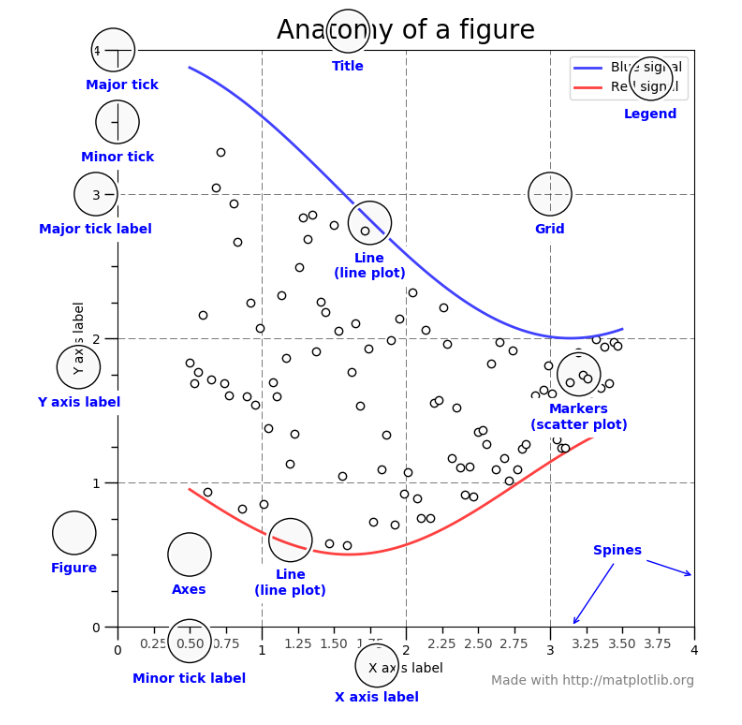Parts of a Figure

<h3> Figure </h3>

The whole figure. The figure keeps track of all the child Axes, a group of 'special' artists (titles, figure legends, etc), and the canvas. (The canvas is not the primary focus. It is crucial as it is the object that actually does the drawing to get you your plot, but as the user, it is mostly invisible to you). A figure can contain any number of Axes, but will typically have at least one.

<Figure size 432x288 with 0 Axes>

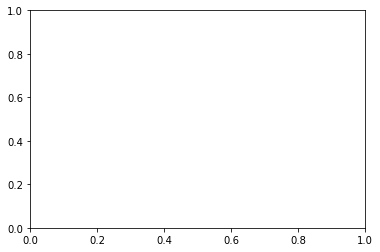

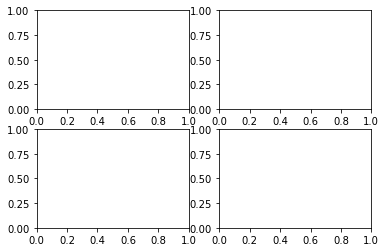

In [4]:
# 새로운 figure를 만드는 가장 쉬운 방법
fig = plt.figure() # an empty figure with no Axes
fig,ax = plt.subplots() # a figure with a single Axes
fig, ax2 = plt.subplots(2,2) # a figure with a 2x2 grid of Axes

<h3>Axes</h3>

This is what you think of as 'a plot'. It is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the axes.Axes.set_xlim() and axes.Axes.set_ylim() methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OO interface.

<h3>Axis</h3>

These are the objects most similar to a number line. They set graph limits and generate ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist

Basically, everything visible on the figure is an artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc... When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

# Types of inputs to plotting functions

All of plotting functions expect numpy.array or numpy.ma.masked_array as input. Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting.

For example, to convert a pandas.DataFrame



In [7]:
a = pd.DataFrame(np.random.rand(4,5),columns = list('abcde'))
a

,a,b,c,d,e
0,0.214323,0.294891,0.240618,0.547653,0.973738
1,0.752553,0.321633,0.098832,0.109823,0.024078
2,0.136425,0.962681,0.829091,0.285481,0.080422
3,0.321423,0.675377,0.292869,0.244424,0.731420


In [9]:
a_asarray = a.values
a_asarray

array([[0.21432311, 0.29489141, 0.24061848, 0.54765329, 0.97373799],
       [0.75255349, 0.32163265, 0.09883162, 0.10982297, 0.02407807],
       [0.13642517, 0.9626813 , 0.82909102, 0.28548084, 0.08042219],
       [0.32142341, 0.67537731, 0.29286876, 0.24442412, 0.73141963]])

and to convert a numpy.matrix

In [13]:
b = np.matrix([[1,2],[3,4]])
b_asarray = np.asarray(b)
b_asarray

array([[1, 2],
       [3, 4]])

# The object-oriented interface and the pyplot interface

As noted above, there are essentially two ways to use Matplotlib:<br>

* Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").

* Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.
<br>
So one can do (OO-style)

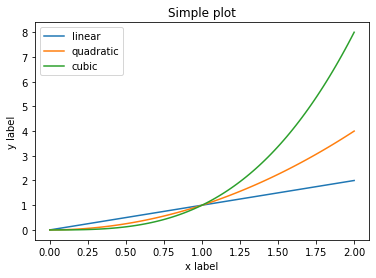

In [14]:
x = np.linspace(0,2,100) # sample data

# Note that even in the oo-style, we use '.pyplot.figure' to create the figure
fig, ax = plt.subplots() # create a figure and axes
ax.plot(x,x,label = 'linear')
ax.plot(x,x**2,label = 'quadratic')
ax.plot(x,x**3,label = 'cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title('Simple plot')
ax.legend()

or (pyplot-style)

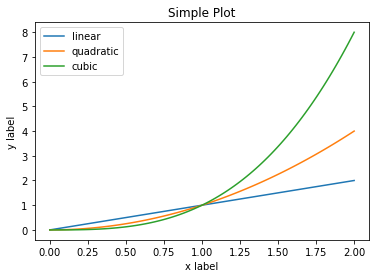

In [15]:
x = np.linspace(0,2,100)

plt.plot(x,x,label = 'linear')
plt.plot(x, x**2, label = 'quadratic')
plt.plot(x, x**3, label  = 'cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title('Simple Plot')
plt.legend()

In addition, there is a third approach, for the case when embedding Matplotlib in a GUI application, which completely drops pyplot, even for figure creation. We won't discuss it here; see the corresponding section in the gallery for more info (Embedding Matplotlib in graphical user interfaces).

Matplotlib's documentation and examples use both the OO and the pyplot approaches (which are equally powerful), and you should feel free to use either (<b>however, it is preferable pick one of them and stick to it</b>, instead of mixing them). <br>In general, we suggest to restrict pyplot to interactive plotting (e.g., in a Jupyter notebook), and to prefer the OO-style for non-interactive plotting (in functions and scripts that are intended to be reused as part of a larger project). <br>
* interactive한 그래프 : pyplot스타일 <br>
* non-interactive한 그래프 : OO-style

If you need to make the same plots over and over again with different data sets, use the recommended signature function below.

In [16]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph
    
    Parameters
    --------------
    ax : Axes
        the axes to draw to
        
    data1 : array
        The x data
        
    data2 : array
        The y data
        
    param_dict : dict
        Dictionary of keyword arguments to pass to ax.plot
    
    Returns
    --------------
    out : list
        list of artists added
    """
    
    out = ax.plot(data1, data2, **param_dict)
    return out

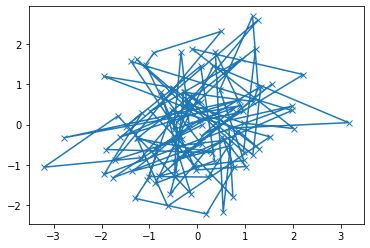

In [17]:
data1, data2, data3, data4 = np.random.randn(4,100)
fig, ax = plt.subplots(1,1)
my_plotter(ax, data1, data2,{'marker' : 'x'})

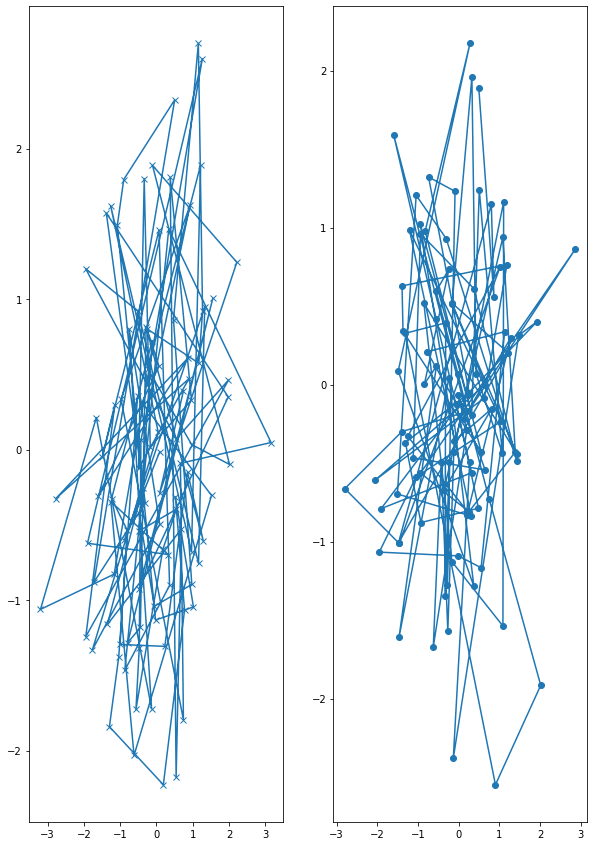

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (10,15)) # 여기에다가 figure 사이즈를 넓히자!
my_plotter(ax1, data1, data2,{'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker' : 'o'})

# 혼자서 궁금한 것.

In [50]:
def test_1(data):
    print(**data) #  print()라는 함수 안에의 파라미터 값을 test_1의 인자 값으로 받겠다!
    

    
def test_2(*data_2): # 처음부터 data_2의 형태를 list로 받겠다! test_2의 파라미터를 scalar 또는 최대한 list형태로 받겠다!
    print(data_2)
    print(type(data_2)) # 근데 인자로 받은 값은 내부 함수가 실행될 때, 바뀌지 않는다. tuple로 되기 때문.

In [48]:
test_2(1)

(1,)
<class 'tuple'>


In [43]:
test_1({'end' : '\n'})